<a href="https://colab.research.google.com/github/AbdulazeezAbdullah/Salary_Predictions/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Load data
data = pd.read_csv('survey_results_public.csv')
data.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


# Exploratory Analysis

In [3]:
#Profile the train data
from pandas_profiling import ProfileReport
profile = ProfileReport(data[[ 'MainBranch', 'Employment', 'Country', 'EdLevel', 'Age1stCode', 'YearsCode',
       'YearsCodePro', 'OrgSize', 'Age','ConvertedCompYearly']], title=" Dataset Exploratory Analysis", html={'style': {'full_width': True}}, sort=None)
profile.to_notebook_iframe()

SyntaxError: invalid syntax (ipython-input-3-2071243573.py, line 2)

# Data Cleaning

In [4]:
#Get a list of all columns
data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [5]:
#Removing unnecessary columns
data = data[[ 'MainBranch', 'Employment', 'Country', 'EdLevel', 'Age1stCode', 'YearsCode',
       'YearsCodePro', 'OrgSize', 'Age','ConvertedCompYearly']]

In [6]:
#renaming columns
data = data.rename({'ConvertedCompYearly': 'Salary'}, axis = 1)
data.head()

,MainBranch,Employment,Country,EdLevel,Age1stCode,YearsCode,YearsCodePro,OrgSize,Age,Salary
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,NaN,NaN,20 to 99 employees,25-34 years old,62268.0
1,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,7,NaN,NaN,18-24 years old,NaN
2,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,NaN,NaN,NaN,18-24 years old,NaN
3,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,100 to 499 employees,35-44 years old,NaN
4,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,17,10,"Just me - I am a freelancer, sole proprietor, ...",25-34 years old,NaN


Note that since our target variable is the salary column, any missing datapoint in this variable would be removed. The reason behind this the objective is for the model to be able to accurately predict salary as much as possible. Hence missing datapoints can't help the model learn.

In [7]:
#Renmoving empty values on the salary column
data = data[data.Salary.notnull()]
data.head()

,MainBranch,Employment,Country,EdLevel,Age1stCode,YearsCode,YearsCodePro,OrgSize,Age,Salary
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,NaN,NaN,20 to 99 employees,25-34 years old,62268.0
9,I am a developer by profession,Employed full-time,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,7,4,10 to 19 employees,25-34 years old,51552.0
11,I am a developer by profession,Employed full-time,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,12,5,10 to 19 employees,25-34 years old,46482.0
12,I am a developer by profession,Employed full-time,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,15,6,"1,000 to 4,999 employees",25-34 years old,77290.0
16,I am a developer by profession,Employed full-time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5 - 10 years,6,2,100 to 499 employees,25-34 years old,17748.0


In [8]:
#Checking if salary column has null values
data.Salary.isnull().sum()

np.int64(0)

In [9]:
#Check general info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8787 entries, 0 to 15218
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MainBranch    8787 non-null   object 
 1   Employment    8784 non-null   object 
 2   Country       8787 non-null   object 
 3   EdLevel       8782 non-null   object 
 4   Age1stCode    8785 non-null   object 
 5   YearsCode     8577 non-null   object 
 6   YearsCodePro  8572 non-null   object 
 7   OrgSize       8778 non-null   object 
 8   Age           8771 non-null   object 
 9   Salary        8787 non-null   float64
dtypes: float64(1), object(9)
memory usage: 755.1+ KB


In [10]:
#Check missing values
data.isna().sum()

,0
MainBranch,0
Employment,3
Country,0
EdLevel,5
Age1stCode,2
YearsCode,210
YearsCodePro,215
OrgSize,9
Age,16
Salary,0


The column with the highest number of missing values is the YearsCodePro Column which is 453 missing entries. Comparing this to the total entries (46844), removing them would not significantly affect the model.

In [11]:
#Drop all rows with empty values
data = data.dropna()
data.isna().sum()

,0
MainBranch,0
Employment,0
Country,0
EdLevel,0
Age1stCode,0
YearsCode,0
YearsCodePro,0
OrgSize,0
Age,0
Salary,0


# Data Preparation for Model

In [12]:
data.Country.value_counts()

,count
Country,
United States of America,1955
India,664
Germany,652
United Kingdom of Great Britain and Northern Ireland,555
Canada,358
...,...
Swaziland,1
Saint Kitts and Nevis,1
Rwanda,1


A closer look at the country column showed that several countries have just a few datapoint and it's going to be difficult for the model to learn effectively from this. Hence, countries with very few data point will be grouped as Others

In [13]:
#Creating a function that groups countries with few datapoints
def group_countries(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] ='Other'
    return categorical_map

In [14]:
#Categorize countries with data points less than 100 as Others
country_map = group_countries(data.Country.value_counts(), 100)
data.Country = data.Country.map(country_map)
data.Country.value_counts()

,count
Country,
Other,2287
United States of America,1955
India,664
Germany,652
United Kingdom of Great Britain and Northern Ireland,555
Canada,358
France,338
Poland,227
Netherlands,220


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

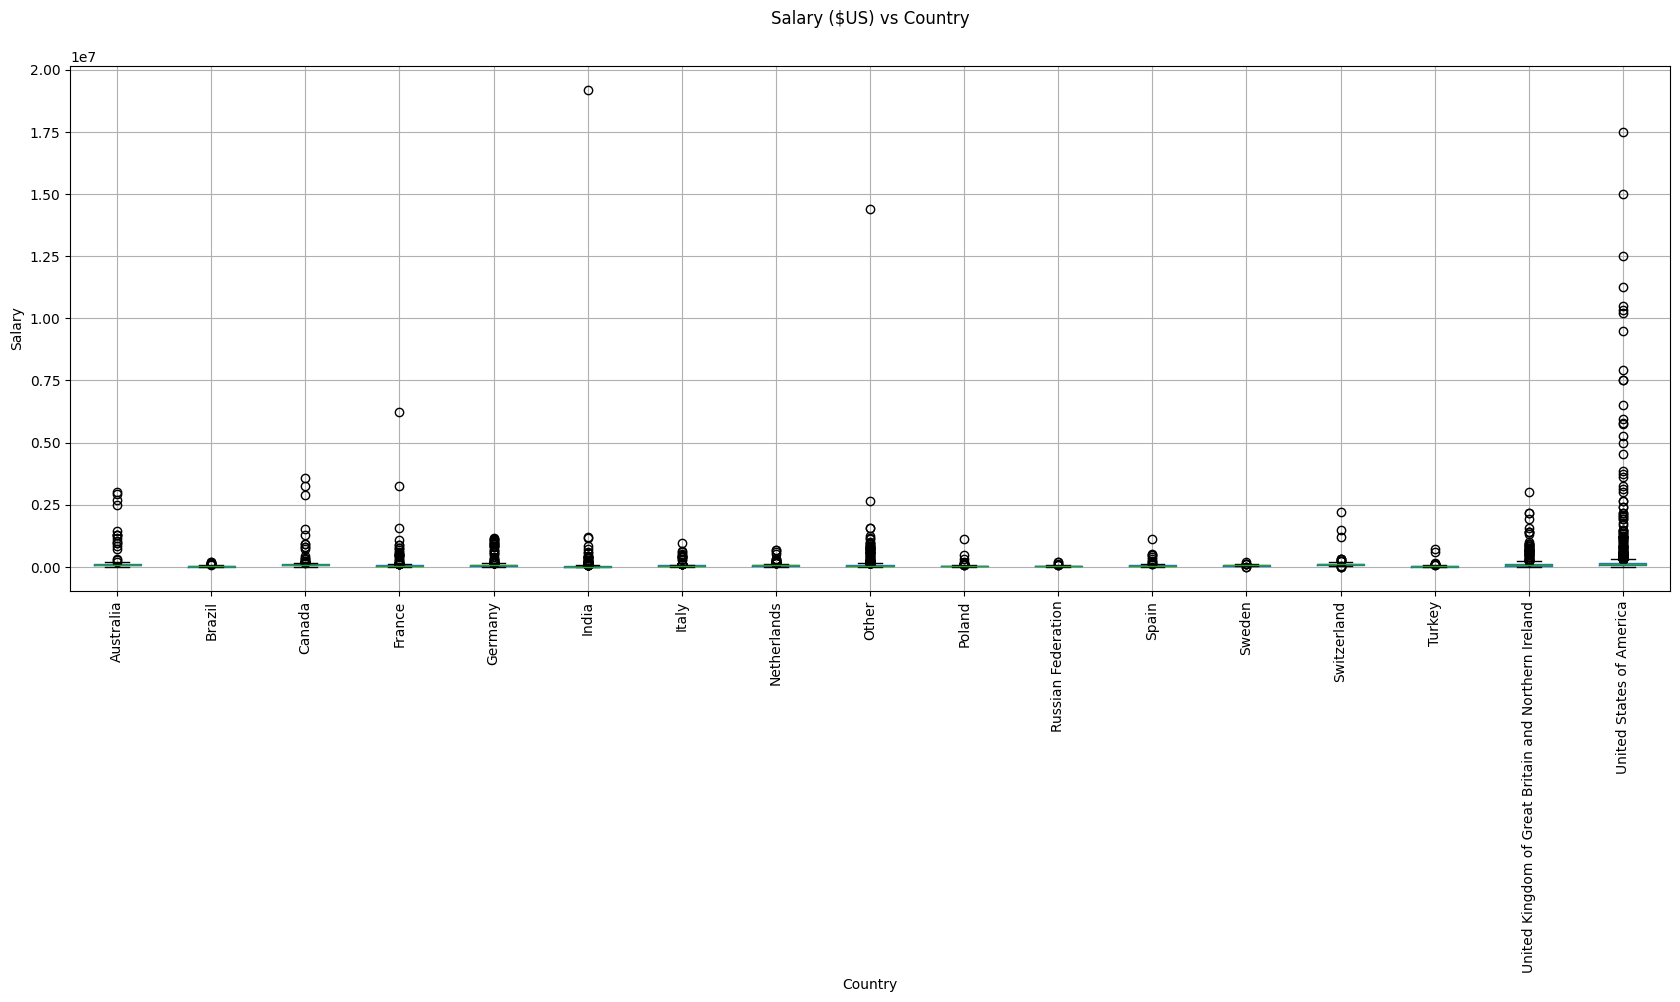

In [16]:
# Examining Salary distribution across all countries
fig, ax = plt.subplots(1,1, figsize=(20,7))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary ($US) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

A closer look shows the presence of several outliers. Hence these outliers will be removed to ensure optimal accuracy for the model.

In [17]:
data = data[data.Salary <= 250000]

In [18]:
data.Salary.mean()

np.float64(67962.99802249412)

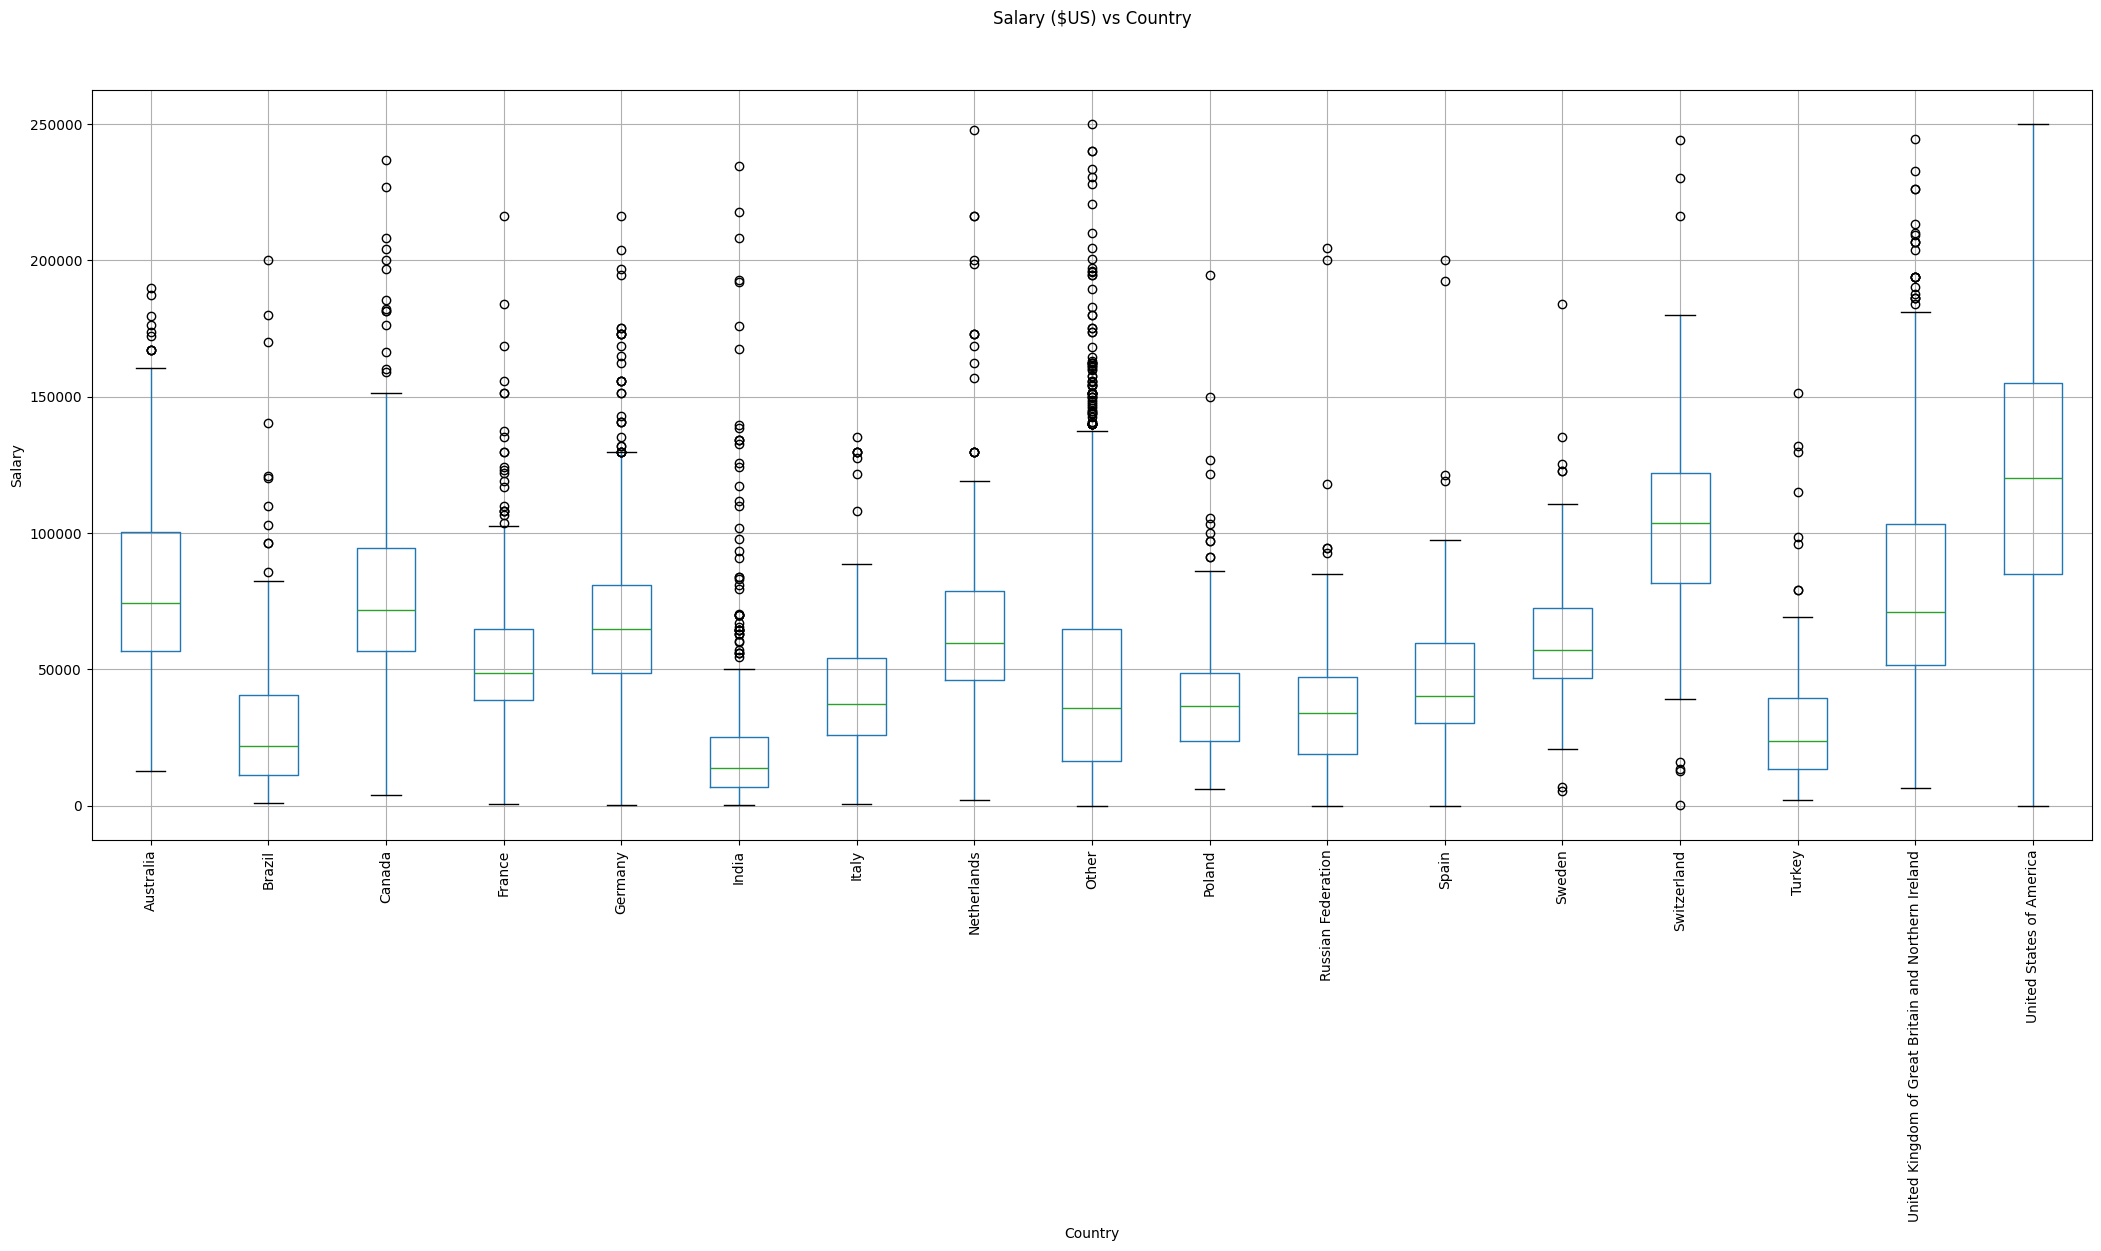

In [19]:
# Examining Salary distribution across all countries
fig, ax = plt.subplots(1,1, figsize=(25,10))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary ($US) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

Although there are still outliers but the effect on our model has been minimized

In [20]:
#Examining the YearsCodePro Column
data.YearsCodePro.unique()

array(['4', '5', '6', '2', '30', '18', '21', '16', '10',
       'Less than 1 year', '3', '15', '1', '12', '8', '7', '17', '14',
       '26', '25', '34', '11', '24', '22', '13', '9', '20', '31', '23',
       '39', '27', '19', '35', '33', 'More than 50 years', '37', '43',
       '40', '29', '38', '32', '42', '28', '36', '44', '47', '45', '41',
       '50'], dtype=object)

Years Code Pro has to do with the number of years the respondent have coded professionally, since our model can't work with strings, the column have to be converted to a number

In [21]:
#Create a function that converts string to number
def convert_to_number(x):
    if x == 'More than 50 years':
        return 50
    elif x == 'Less than 1 year':
        return 0.5
    else:
        return float(x)

In [22]:
#Applying the function to the YearsCodePro  and YearsCode column
data.YearsCodePro = data.YearsCodePro.apply(convert_to_number)
print("Years Code Professionally includes", data.YearsCodePro.unique())

print('\n')

data.YearsCode = data.YearsCode.apply(convert_to_number)
print("Years Code Professionally includes", data.YearsCode.unique())

Years Code Professionally includes [ 4.   5.   6.   2.  30.  18.  21.  16.  10.   0.5  3.  15.   1.  12.
  8.   7.  17.  14.  26.  25.  34.  11.  24.  22.  13.   9.  20.  31.
 23.  39.  27.  19.  35.  33.  50.  37.  43.  40.  29.  38.  32.  42.
 28.  36.  44.  47.  45.  41. ]


Years Code Professionally includes [ 7.  12.  15.   6.   9.  40.  26.  14.  39.  20.   4.  17.  19.   8.
 22.  34.  21.   5.  13.  25.  24.  10.  31.  18.  38.   3.  27.   1.
 30.   2.  41.  42.  16.  35.  23.  28.  37.  44.  11.  33.  36.  45.
 50.  43.  29.  32.  47.  49.  48.   0.5 46. ]


In [23]:
#Examining the Edlevel column
data.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

The Education level has several categories but we need to make the categories concise and clear

In [24]:
#Create a function that groups the categories
def education_group(x):
    if ("Bachelor" in x):
        return "Bachelor's degree"
    elif ("Master" in x):
        return "Master's degree"
    elif ("Professional degree" in x) or ("Other doctoral" in x):
        return "Post grad"
    else:
        return "WAEC/NECO and it's equivalent worldwide"

In [25]:
#Categorizing the Edlevel column
data.EdLevel = data.EdLevel.apply(education_group)

In [26]:
data.Age.unique()

array(['25-34 years old', '45-54 years old', '35-44 years old',
       '18-24 years old', '55-64 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say'], dtype=object)

In [27]:
data.columns

Index(['MainBranch', 'Employment', 'Country', 'EdLevel', 'Age1stCode',
       'YearsCode', 'YearsCodePro', 'OrgSize', 'Age', 'Salary'],
      dtype='object')

In [28]:
#Transforming categorical variables to numbers the model interpret
from sklearn.preprocessing import LabelEncoder

MainBranch_encoder = LabelEncoder()
data.MainBranch = MainBranch_encoder.fit_transform(data.MainBranch)
print("MainBranch group include", data.MainBranch.unique())
print('\n')

Employment_encoder = LabelEncoder()
data.Employment = Employment_encoder.fit_transform(data.Employment)
print("Employment group include", data.Employment.unique())
print('\n')

Country_encoder = LabelEncoder()
data.Country = Country_encoder.fit_transform(data.Country)
print("Country group include", data.Country.unique())
print('\n')

EdLevel_encoder = LabelEncoder()
data.EdLevel = EdLevel_encoder.fit_transform(data.EdLevel)
print("EdLevel group include", data.EdLevel.unique())
print('\n')

Age1stCode_encoder = LabelEncoder()
data.Age1stCode = Age1stCode_encoder.fit_transform(data.Age1stCode)
print("Age1stCode group include", data.Age1stCode.unique())
print('\n')

OrgSize_encoder = LabelEncoder()
data.OrgSize = OrgSize_encoder.fit_transform(data.OrgSize)
print("OrgSize group include", data.OrgSize.unique())
print('\n')

Age_encoder = LabelEncoder()
data.Age = Age_encoder.fit_transform(data.Age)
print("Age group include", data.Age.unique())



MainBranch group include [0 1]


Employment group include [0 2 1 3 4]


Country group include [12 11  4 14  2  8  3 13 15 10 16  1  6  7  9  5  0]


EdLevel group include [1 0 2 3]


Age1stCode group include [0 5 2 1 3 8 4 6 7]


OrgSize group include [1 0 3 7 6 4 5 2 9 8]


Age group include [1 3 2 0 4 5 7 6]


In [29]:
data.head()

,MainBranch,Employment,Country,EdLevel,Age1stCode,YearsCode,YearsCodePro,OrgSize,Age,Salary
9,0,0,12,1,0,7.0,4.0,1,1,51552.0
11,0,0,11,0,0,12.0,5.0,1,1,46482.0
12,0,0,4,1,0,15.0,6.0,0,1,77290.0
16,0,0,14,0,5,6.0,2.0,3,1,17748.0
17,0,0,2,0,0,9.0,6.0,7,1,46135.0


In [30]:
#Splitting data into labels and features
X = data.drop('Salary', axis = 1)
y = data.Salary

In [31]:
#Split data into test and train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
X_train.head()

,MainBranch,Employment,Country,EdLevel,Age1stCode,YearsCode,YearsCodePro,OrgSize,Age
13519,0,0,8,0,1,7.0,5.0,7,1
5697,0,0,16,1,5,33.0,19.0,7,2
1464,0,0,9,1,0,13.0,5.0,2,1
8147,0,0,8,1,0,8.0,2.0,1,1
4765,1,0,10,0,0,10.0,3.0,0,0


# Linear Regression Model

In [33]:
#Import Library
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Training the model
LR_model = regressor.fit(X_train, y_train)

In [34]:
#Making predictions
LR_predictions = LR_model.predict(X_test)

In [35]:
#Import libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#Calculate MSE
MSE = mean_squared_error(y_test, LR_predictions)
print("Mean Squared Error is:", MSE)

#Calculate MAE
MSE = mean_absolute_error(y_test, LR_predictions)
print("Mean Absolute Error is:", MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is:", RMSE)

Mean Squared Error is: 1771410903.393086
Mean Absolute Error is: 32556.044827113943
Root Mean Squared Error is: 180.43293720137115


# Decision Tree Regressor Model

In [36]:
#Import Library
from sklearn.tree import DecisionTreeRegressor
Decison_Tree = DecisionTreeRegressor()

#Training the model
DTR_model = Decison_Tree.fit(X_train, y_train)

In [37]:
#Making predictions
DTR_predictions = DTR_model.predict(X_test)

In [38]:
#Calculate MSE
MSE = mean_squared_error(y_test, DTR_predictions)
print("Mean Squared Error is:", MSE)

#Calculate MAE
MSE = mean_absolute_error(y_test, DTR_predictions)
print("Mean Absolute Error is:", MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is:", RMSE)

Mean Squared Error is: 2417077265.8589144
Mean Absolute Error is: 34538.801345414606
Root Mean Squared Error is: 185.84617656926548


# Random Forest Regressor

In [39]:
#Import Library
from sklearn.ensemble import RandomForestRegressor
Random_Forest = RandomForestRegressor()

#Train the model
RF_model = Random_Forest.fit(X_train, y_train)

In [40]:
#Making predictions
RF_predictions = RF_model.predict(X_test)

In [41]:
#Calculate MSE
MSE = mean_squared_error(y_test, RF_predictions)
print("Mean Squared Error is:", MSE)

#Calculate MAE
MSE = mean_absolute_error(y_test, RF_predictions)
print("Mean Absolute Error is:", MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is:", RMSE)

Mean Squared Error is: 1344856036.2761319
Mean Absolute Error is: 25959.284477177636
Root Mean Squared Error is: 161.1188520229015


# Lasso Regression

In [42]:
#Import Library
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

#Define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

Lassso = LassoCV(alphas=np.arange(0,1,0.01), cv=cv, n_jobs=-1)

#Training the model
Lasso_model = Lassso.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4598545916556.221, tolerance: 1354672355.1178057
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did

In [43]:
#Making predictions
Lasso_predictions = Lasso_model.predict(X_test)

In [44]:
#Calculate MSE
MSE = mean_squared_error(y_test, Lasso_predictions)
print("Mean Squared Error is:", MSE)

#Calculate MAE
MSE = mean_absolute_error(y_test, Lasso_predictions)
print("Mean Absolute Error is:", MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is:", RMSE)

Mean Squared Error is: 1771397646.1489398
Mean Absolute Error is: 32555.903613080493
Root Mean Squared Error is: 180.43254588094825


# Ridge Regression

In [45]:
#Import Library
from sklearn.linear_model import Ridge
Riidge = Ridge()

#Training the model
Ridge_model = Riidge.fit(X_train, y_train)

In [46]:
#Making predictions
Ridge_predictions = Ridge_model.predict(X_test)

In [47]:
#Calculate MSE
MSE = mean_squared_error(y_test, Ridge_predictions)
print("Mean Squared Error is:", MSE)

#Calculate MAE
MSE = mean_absolute_error(y_test, Ridge_predictions)
print("Mean Absolute Error is:", MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is:", RMSE)

Mean Squared Error is: 1771401144.563127
Mean Absolute Error is: 32555.93097774369
Root Mean Squared Error is: 180.4326217116619


# KNN

In [48]:
#Import Library
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

#Training the model
knn_model = knn.fit(X_train, y_train)

In [49]:
#Making predictions
knn_predictions = knn_model.predict(X_test)

In [50]:
#Calculate MSE
MSE = mean_squared_error(y_test, knn_predictions)
print("Mean Squared Error is:", MSE)

#Calculate MAE
MSE = mean_absolute_error(y_test, knn_predictions)
print("Mean Absolute Error is:", MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is:", RMSE)

Mean Squared Error is: 1590907519.1810212
Mean Absolute Error is: 29451.87726523888
Root Mean Squared Error is: 171.61549249773134


In [51]:
# Checking the mean salary
data.Salary.mean()

np.float64(67962.99802249412)

Since the average salary is about 65 thousand dollars and the Random Forest Model Error is about 100 dollars which is quite acceptable. Hence we will be going with the Random Forest Model in the production environment

# Save the Model

In [52]:
import joblib

In [53]:
saved_model = {"model": RF_model, "MainBranch_encoder": MainBranch_encoder, "Country_encoder": Country_encoder, "Employment_encoder": Employment_encoder,
        "EdLevel_encoder": EdLevel_encoder, "Age1st_encoder": Age1stCode_encoder , "OrgSize_encoder": OrgSize_encoder, "Age_encoder": Age_encoder}

with open('Random Forest Model.pkl', 'wb') as file:
    joblib.dump(saved_model,file)

# Load and Test the Model

In [54]:
# Load the model
with open('Random Forest Model.pkl', 'rb') as file:
    saved_model = joblib.load(file)

model = saved_model["model"]
MainBranch_encode = saved_model["MainBranch_encoder"]
Employment_encode = saved_model["Employment_encoder"]
Country_encode = saved_model["Country_encoder"]
EdLevel_encode = saved_model["EdLevel_encoder"]
Age1st_encode = saved_model["Age1st_encoder"]
OrgSize_encode = saved_model["OrgSize_encoder"]
Age_encode = saved_model["Age_encoder"]

In [55]:
data.head(2)

,MainBranch,Employment,Country,EdLevel,Age1stCode,YearsCode,YearsCodePro,OrgSize,Age,Salary
9,0,0,12,1,0,7.0,4.0,1,1,51552.0
11,0,0,11,0,0,12.0,5.0,1,1,46482.0


In [56]:
input = np.array([['I am a developer by profession', 'Employed full-time', 'Spain', "Master's degree", '11 - 17 years', 7., 7., '10 to 19 employees', '25-34 years old']])
input

array([['I am a developer by profession', 'Employed full-time', 'Spain',
        "Master's degree", '11 - 17 years', '7.0', '7.0',
        '10 to 19 employees', '25-34 years old']], dtype='<U32')

In [57]:
input[:, 0] = MainBranch_encode.transform(input[:, 0])
input[:, 1] = Employment_encode.transform(input[:, 1])
input[:, 2] = Country_encode.transform(input[:, 2])
input[:, 3] = EdLevel_encode.transform(input[:, 3])
input[:, 4] = Age1st_encode.transform(input[:, 4])
input[:, 7] = OrgSize_encode.transform(input[:, 7])
input[:, 8] = Age_encode.transform(input[:, 8])

In [58]:
input.astype(float)

array([[ 0.,  0., 11.,  1.,  0.,  7.,  7.,  1.,  1.]])

In [59]:
input_prediction = model.predict(input)
input_prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([56310.69])